In [1]:
from optimizer import *

In [2]:
import matplotlib.pyplot as plt

### let's open the file 23 stocks' daily returns from January 4th, 2016 to December 28th, 2017 from Yahoo Finance. 

In [3]:
stock_returns = pd.read_excel("../FERM_3_Assignment_1.xlsx", sheet_name="Daily_Returns_Q1_Q2")

In [4]:
stock_returns.head()

,date,IBM,GE,LLY,F,BAC,KR,ITUB,GG,SIRI,...,T,ECA,ABEV,CVS,MRVL,CSCO,MO,BMY,WFC,HBAN
0,2016-01-04,-0.000736,0.000976,0.014852,-0.018058,0.000000,0.022343,0.008006,-0.023029,-0.010178,...,0.006963,0.026925,0.013954,0.002899,-0.032335,-0.004554,0.020011,0.019501,-0.000378,0.001867
1,2016-01-05,-0.005018,-0.016069,-0.006321,-0.045479,-0.021533,-0.000951,-0.008006,0.018804,-0.005128,...,-0.015441,-0.062643,-0.011614,-0.012273,-0.056744,-0.010708,0.010534,-0.017713,-0.019281,-0.015985
2,2016-01-06,-0.017237,-0.043235,-0.026306,-0.031773,-0.036736,-0.023581,-0.031023,0.074229,-0.012937,...,-0.016280,-0.049700,-0.040530,-0.014546,0.009889,-0.023338,-0.017561,-0.028090,-0.028942,-0.030801
3,2016-01-07,-0.009301,-0.018113,-0.001967,-0.012678,-0.019545,-0.006596,0.000000,-0.018247,-0.007843,...,0.000895,0.037504,0.016888,-0.006605,0.011009,-0.025106,0.001719,-0.025754,-0.016807,-0.017752
4,2016-01-08,0.012082,0.004559,-0.012135,0.018175,0.007211,0.011696,-0.001660,-0.055982,0.002621,...,0.012150,-0.035384,-0.016888,0.014431,0.012092,0.019581,0.020731,-0.010268,0.010637,0.004963


In [5]:
# compute mean and covariance matrix of these stocks

In [6]:
mean_return_matrix = stock_returns.drop(columns=["date"]).mean()
cov_matrix = stock_returns.drop(columns=["date"]).cov()

## Perform mean-vatiance optimization with the following constraints:

## minimize $x^{T}Vx $ (1)
## s.t. $\mu^{T}x>=$0.0005 (2)
## $\sum_{i=0}^{n} x_i$ = 1 (3)

In [7]:
targeted_return1 = 0.0005

In [8]:
w_port1, var_port1, return_port1, result_port1 = mean_variance_opt(mean_return_matrix, cov_matrix, targeted_return1)
print("portfolio weights:", w_port1)
print("portfolio mean return : ", round(return_port1, 4)*100, "%")
print("vol:", round(np.sqrt(var_port1)*100, 4), "%")
print("variance:", round(var_port1, 6))

portfolio weights: [ 0.08917668 -0.0208372   0.02284051 -0.04303578  0.05731254  0.02201725
 -0.02518617  0.07055633  0.06539291  0.01996536 -0.02433193  0.1721223
 -0.03507993  0.14724748  0.00426806  0.02246318  0.03250857  0.03563451
  0.06099552  0.23302199  0.04377781  0.03257602  0.016594  ]
portfolio mean return :  0.05 %
vol: 0.5765 %
variance: 3.3e-05


## change the targeted return to 0.08%, modifty condition (2)

In [9]:
targeted_return2 = 0.0008

In [10]:
w_port2, var_port2, return_port2, result_port2 = mean_variance_opt(mean_return_matrix, cov_matrix, targeted_return2)
print("portfolio weights:", w_port2)
print("portfolio mean return : ", round(return_port2, 4)*100, "%")
print("vol:", round(np.sqrt(var_port2)*100, 4), "%")
print("variance:", round(var_port2, 6))

portfolio weights: [ 0.08487447 -0.09014136  0.01296829 -0.06506253  0.10457585  0.00951425
 -0.0209608   0.06928991  0.06755356  0.02874223 -0.0157054   0.19270345
 -0.05069327  0.17419936  0.00627226  0.01381521  0.02160798  0.05163818
  0.08246393  0.2562859   0.04432042  0.01454507  0.00719301]
portfolio mean return :  0.08 %
vol: 0.6151 %
variance: 3.8e-05


## change the targeted return to 0.8%, modifty condition (2)

In [35]:
targeted_return3 = 0.0138

In [36]:
w_port3, var_port3, return_port3, result_port3 = mean_variance_opt(mean_return_matrix, cov_matrix, targeted_return3)
print("portfolio weights:", w_port3)
print("portfolio mean return : ", round(return_port3, 4)*100, "%")
print("vol:", round(np.sqrt(var_port3)*100, 4), "%")
print("variance:", round(var_port3, 6))

portfolio weights: [-0.09125711 -3.07332718 -0.44935049 -1.02452121  2.14246665 -0.5511799
  0.14648344  0.02806392  0.1735167   0.41054348  0.35651675  1.02226761
 -0.7081738   1.35316844  0.08563127 -0.36188072 -0.43734989  0.76760951
  1.01623769  1.28638602  0.03034163 -0.74891931 -0.37327349]
portfolio mean return :  1.38 %
vol: 5.2838 %
variance: 0.002792


## Sharpe ratio optimization 

In [48]:
rf = 0.00001

In [49]:
w_sharpe, var_sharpe, return_sharpe, result_sharpe = sharpe_ratio_optimization(mean_return_matrix, cov_matrix, rf, short_allowed=True)

In [50]:
vol_sharpe = np.sqrt(var_sharpe)*100

In [51]:
print("portfolio weights:", w_sharpe)
print("portfolio mean return : ", round(return_sharpe, 4)*100, "%")
print("vol:", round(vol_sharpe, 4), "%")
print("variance:", round(var_sharpe, 6))

portfolio weights: [-0.14552252 -3.96508304 -0.58639774 -1.30909854  2.74945578 -0.71799854
  0.19591199  0.0157397   0.20310567  0.52442402  0.46753742  1.2702412
 -0.90436085  1.70463939  0.10935665 -0.47238419 -0.57403305  0.98176911
  1.29478222  1.5943367   0.02599257 -0.97790606 -0.48450788]
portfolio mean return :  1.77 %
vol: 6.7684 %
variance: 0.004581


## Let's create efficiency frontier with returns from 

In [58]:
front_returns = np.linspace(0.0002, 0.02, 100)

In [53]:
def plot_efficient_frontier(front_returns, mu, cov_matrix, rf):
    """
    front_returns: (K,) array of target returns
    mu: (n,) expected returns
    cov_matrix: (n,n) covariance matrix
    minimizer_for_target_return: function(target_return) -> weights (n,)
        (You can also accept mu,cov_matrix; adjust the call below accordingly.)
    """
    front_returns = np.asarray(front_returns, float)
    mu = np.asarray(mu, float).reshape(-1)
    cov_matrix = np.asarray(cov_matrix, float)

    K = front_returns.size
    n = mu.size

    # Preallocate for speed
    W = np.empty((K, n), dtype=float)
    vols = np.full(K, np.nan, dtype=float)
    rets = np.full(K, np.nan, dtype=float)

    # Solve for each target return
    for k, r_t in enumerate(front_returns):
        x_star, var_star, ret_star, result = mean_variance_opt(mu, cov_matrix, r_t, short_allowed=True)
        w = np.asarray(x_star, float).reshape(-1)

        # store weights (optional but useful)
        W[k, :] = w

        # stats
        rets[k] = float(mu @ w)
        vols[k] = float(np.sqrt(w @ cov_matrix @ w) * 100)

    w_sharpe, var_sharpe, return_sharpe, result_sharpe = sharpe_ratio_optimization(mean_return_matrix, cov_matrix, rf, short_allowed=True)
    vol_sharpe = np.sqrt(var_sharpe)*100

    # In case some targets are infeasible and returned NaNs
    ok = np.isfinite(vols) & np.isfinite(rets)

    plt.figure()
    plt.plot(vols[ok], rets[ok], linestyle='-', marker='.', markersize=2)
    plt.plot(vol_sharpe, return_sharpe, marker = "P", color = "m")
    plt.xlabel("Volatility %")
    plt.ylabel("Expected return")
    plt.title("Efficient Frontier")
    plt.grid(True)
    plt.show()

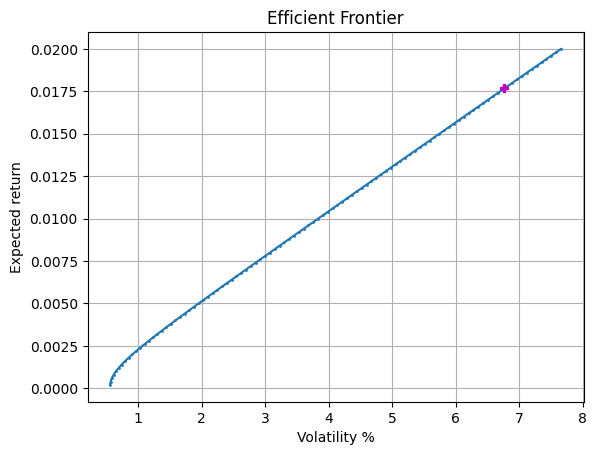

In [59]:
plot_efficient_frontier(front_returns, mean_return_matrix, cov_matrix, rf)